# Classification - K-Nearest Neighbor 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Manoj-A-Thomas/data/data/winequality-red.csv', ';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000230035837B8>,
      dtype=object)

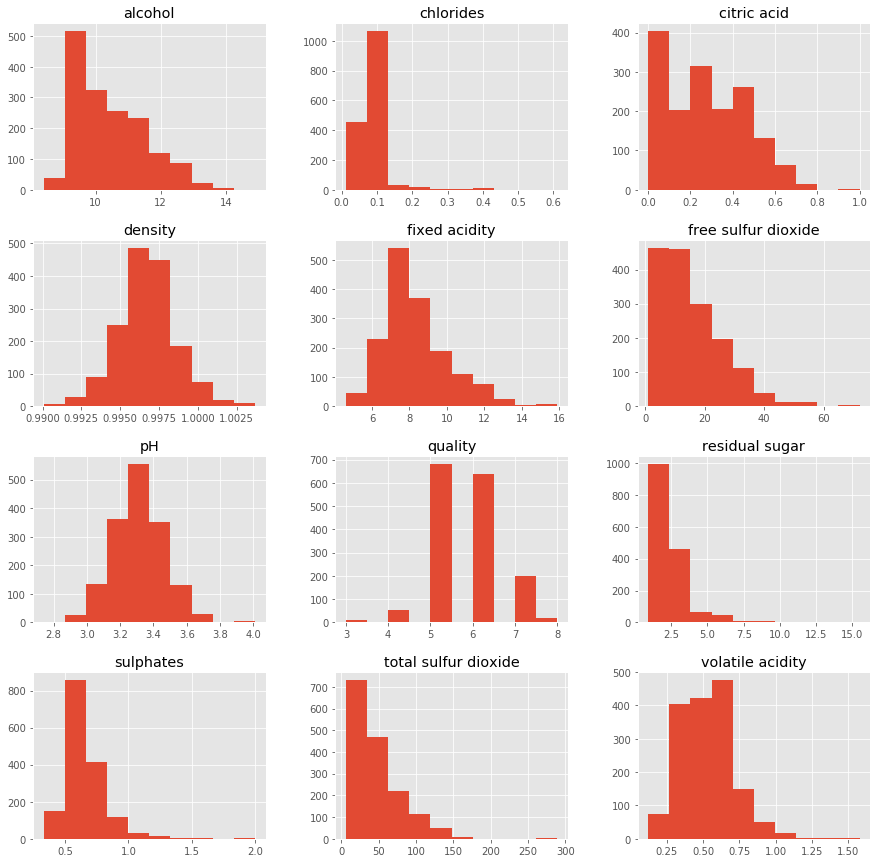

In [4]:
# Visualize EDA 

pd.DataFrame.hist(df, figsize=[15,15])

In [5]:
# Create predictor variables

X = df.drop('quality', axis=1).values

In [6]:
# Create target variable

y1 = df['quality'].values

In [7]:
y = y1 <= 5

In [8]:
y

array([ True,  True,  True, ..., False,  True, False])

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

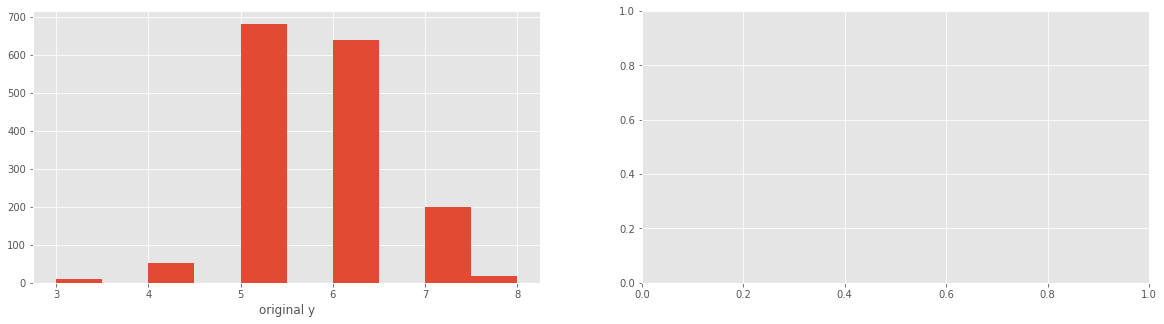

In [9]:
#plot origional y and new y1
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.hist(y1)
plt.xlabel('original y')

plt.subplot(1,2,2)
plt.hist(y)
plt.xlabel('new y1')

In [10]:
# Create train and test 80% and 20% split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [13]:
# Create kNN model and fit model to training data

from sklearn import neighbors, linear_model

knn = neighbors.KNeighborsClassifier(n_neighbors=5)

knn_model1 = knn.fit(X_train,y_train) 

# X_train: the predictor variables in the training set
# y_train: the target variable in the training set

In [14]:
# Model evaluation 

print('kNN accuracy for training set: %f' %knn_model1.score(X_train, y_train))
print('kNN accuracy for test set: %f' %knn_model1.score(X_test, y_test))

kNN accuracy for training set: 0.774042
kNN accuracy for test set: 0.612500


In [34]:
# Actual Prediction

y_pred = knn_model1.predict(X_test)

#Check how accuraly the prediction was

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

#precision is the % of what the model predicted/what the actual outcome was (exactness)

#recall is what % did the model correctly identify (completeness)

              precision    recall  f1-score   support

       False       0.66      0.64      0.65       179
        True       0.56      0.57      0.57       141

   micro avg       0.61      0.61      0.61       320
   macro avg       0.61      0.61      0.61       320
weighted avg       0.61      0.61      0.61       320

